In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
iris = sns.load_dataset('iris')
iris.head()

%matplotlib inline
mpl.rcParams['figure.figsize']=(12.0, 2)
mpl.rcParams['font.size']=14
mpl.rcParams['savefig.dpi']=90
mpl.rcParams['figure.subplot.bottom']=.1

In [2]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

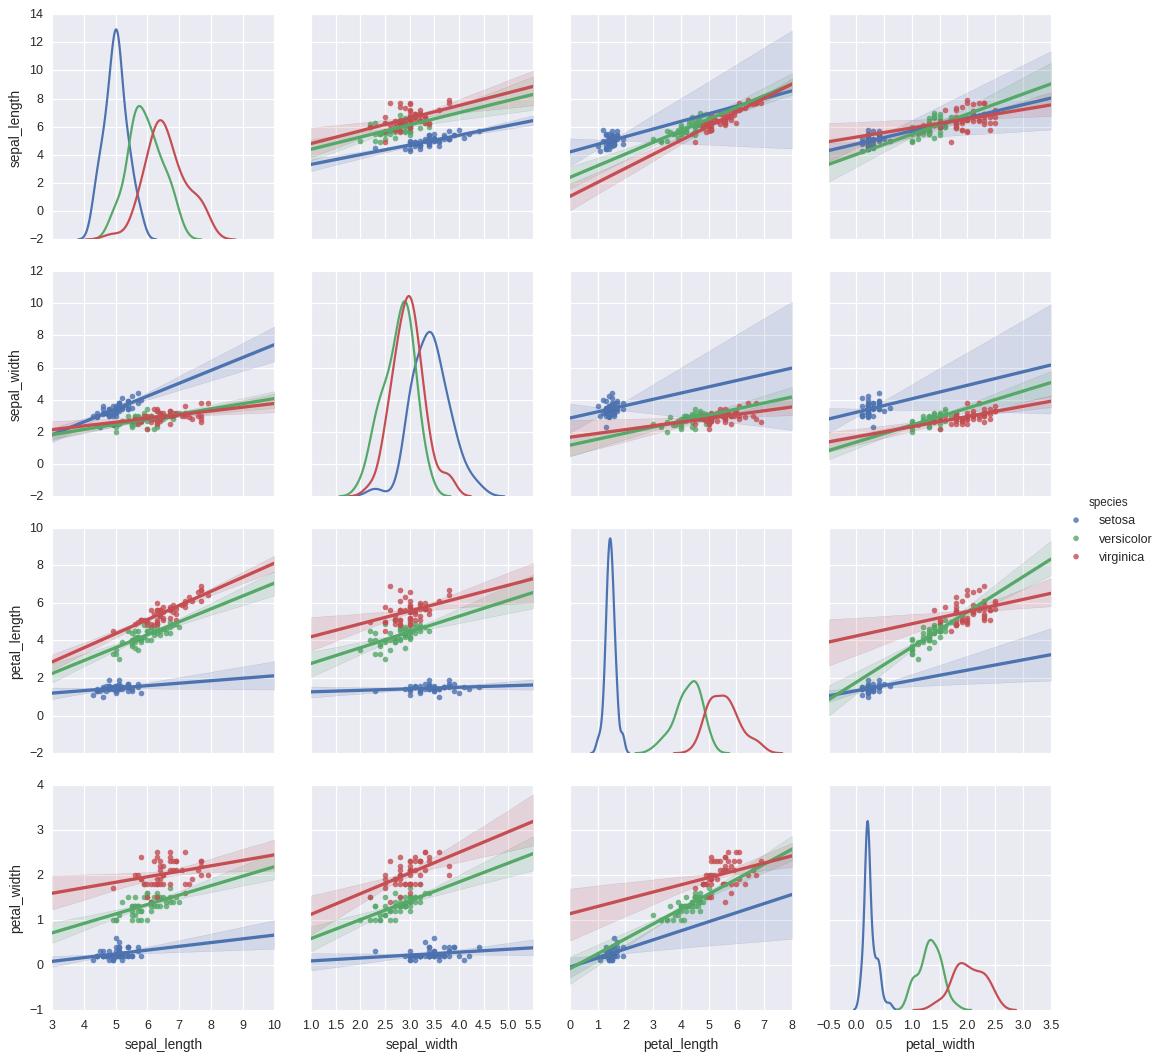

In [3]:
sns.pairplot(iris, size=3, hue='species', diag_kind='kde', kind='reg');

In [4]:
x = iris.drop(['species'], axis=1)
y = iris.species

In [5]:
x.shape, y.shape

((150, 4), (150,))

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.6)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
y_predicted = model.predict(x_test)

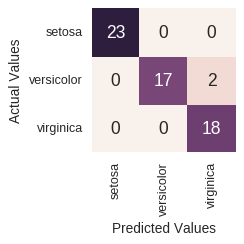

In [9]:
labels = ['setosa', 'versicolor', 'virginica']
conf_mat = confusion_matrix(y_pred=y_predicted, y_true=y_test, labels=labels)
conf_mat_df = pd.DataFrame(data=conf_mat, columns=labels, index=labels)
sns.heatmap(conf_mat_df, cbar=False, annot=True, square=True, xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [10]:
print(classification_report(y_true=y_test, y_pred=y_predicted))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        23
 versicolor       1.00      0.89      0.94        19
  virginica       0.90      1.00      0.95        18

avg / total       0.97      0.97      0.97        60



In [11]:
accuracy_score(y_true=y_test, y_pred=y_predicted)

0.96666666666666667

In [12]:
model.intercept_

array([ 0.23904478,  0.70274473, -0.91947114])

# PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
iris_x = iris.drop('species', axis=1)
model = PCA(n_components=2)
model.fit(iris_x)
x_pca = model.transform(iris_x)
iris['pca_1'] = x_pca[:, 0]
iris['pca_2'] = x_pca[:, 1]

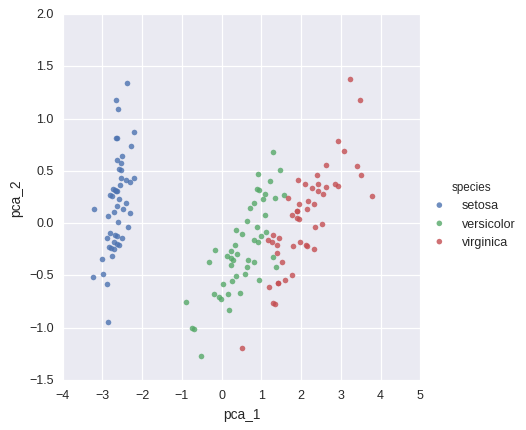

In [17]:
sns.lmplot('pca_1', 'pca_2', data=iris, hue='species', fit_reg=False)

# Gaussian mixture model

In [18]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3)
model.fit(iris_x)
y_gmm = model.predict(iris_x)
iris['cluster'] = y_gmm

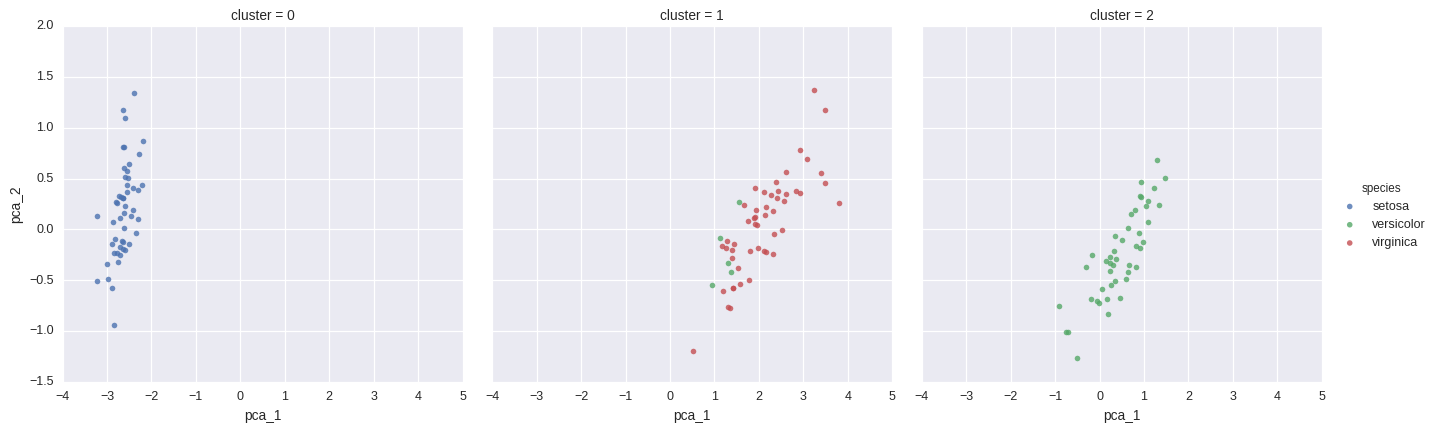

In [19]:
sns.lmplot('pca_1', 'pca_2', data=iris, hue='species', col='cluster', fit_reg=False)

# Application: Exploring Hand-written Digits

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
images = digits.images
x_digits = images.reshape(images.shape[0], 64)
y_digits = digits.target

In [21]:
pca_model = PCA(n_components=2)
pca_model.fit(x_digits)
digits_df = pd.DataFrame(pca_model.transform(x_digits), columns=['pca_1', 'pca_2'])
digits_df['digit'] = y_digits
digits_df.head()

,pca_1,pca_2,digit
0,-1.259466,21.274883,0
1,7.957611,-20.768698,1
2,6.991923,-9.955987,2
3,-15.906105,3.332464,3
4,23.306868,4.269062,4


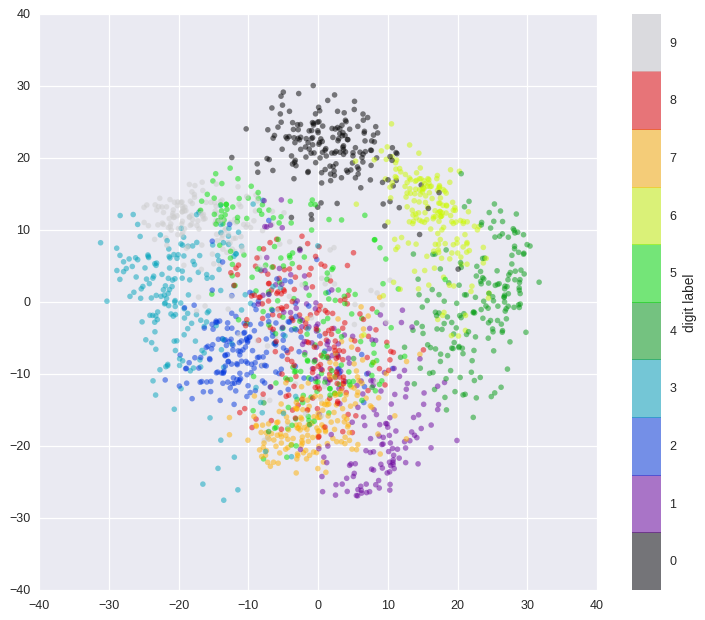

In [22]:
# sns.lmplot('pca_1', 'pca_2', data=digits_df, fit_reg=False, hue='digit')
def plot_digits_pca(dataframe):
    plt.figure(figsize=(10, 8))
    plt.scatter(dataframe.pca_1, dataframe.pca_2, c=dataframe.digit, cmap=plt.cm.get_cmap('spectral', 10), edgecolors='none', alpha=0.5)
    plt.clim(-0.5, 9.5)
    plt.colorbar(label='digit label', ticks=range(10))
plot_digits_pca(digits_df)

## Dimensionality reduction using IsoMap

In [23]:
from sklearn.manifold import Isomap
isomap_model = Isomap(n_components=2)
isomap_model.fit(x_digits)
digits_df = pd.DataFrame(isomap_model.transform(x_digits), columns=['pca_1', 'pca_2'])
digits_df['digit'] = y_digits

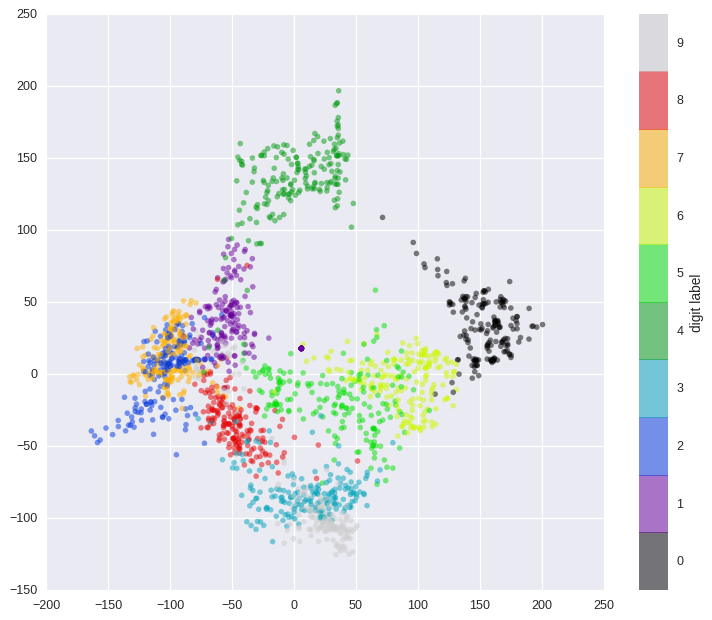

In [24]:
plot_digits_pca(digits_df)

## Classification on digits using simple Gaussian Naive Bayes model

In [25]:
from sklearn.naive_bayes import GaussianNB
x_train, x_test, y_train, y_test = train_test_split(digits_df.drop('digit', axis=1), digits_df['digit'])
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None)

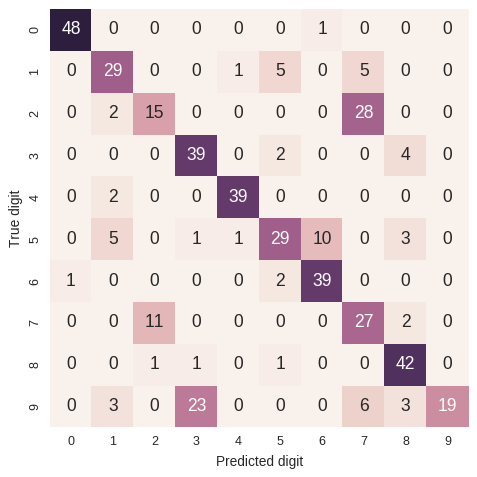

In [30]:
predictions = model.predict(x_test)
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_pred=predictions, y_true=y_test), square=True, annot=True, cbar=False, ax=ax)
plt.xlabel('Predicted digit')
plt.ylabel('True digit')

In [33]:
accuracy_score(y_pred=predictions, y_true=y_test)

0.72444444444444445